In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
import matplotlib.pyplot as plt

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
(train_img, train_lab), (test_img, test_lab) = cifar10.load_data()

In [4]:
train_img.shape

(50000, 32, 32, 3)

In [5]:
train_lab.shape

(50000, 1)

In [6]:
test_img.shape

(10000, 32, 32, 3)

In [7]:
test_lab.shape

(10000, 1)

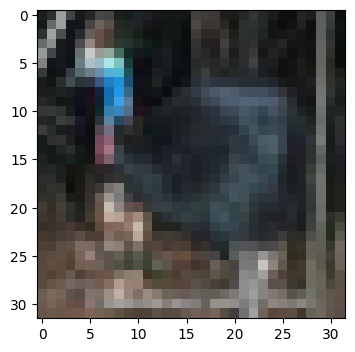

In [11]:
plt.figure(figsize=(4, 4))
plt.imshow(train_img[423])
plt.show()

In [12]:
train_lab[423]

array([2], dtype=uint8)

In [13]:
classes = ["airplane",	"automobile", "bird", "cat", "deer", "dog", "frog",	"horse", "ship", "truck"]

In [15]:
classes[train_lab[423][0]]

'bird'

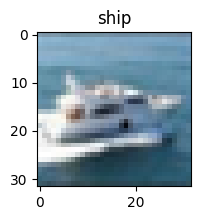

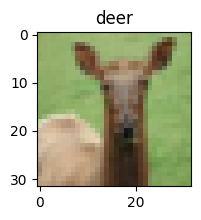

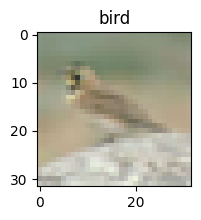

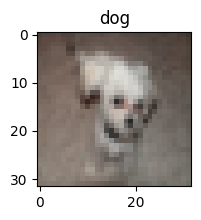

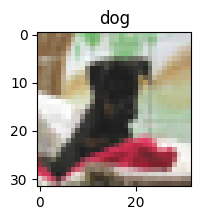

In [20]:
for i in range(5):
    index = np.random.randint(50000)
    plt.figure(figsize=(2, 2))
    plt.imshow(train_img[index])
    plt.title(classes[train_lab[index][0]])
    plt.show()

In [21]:
train_img[423]

array([[[ 27,  31,  30],
        [ 43,  47,  46],
        [156, 159, 159],
        ...,
        [ 91,  94,  93],
        [ 60,  64,  63],
        [ 11,  15,  14]],

       [[ 21,  25,  24],
        [102, 106, 105],
        [155, 159, 158],
        ...,
        [ 93,  96,  95],
        [ 56,  60,  58],
        [ 15,  19,  18]],

       [[ 45,  49,  48],
        [159, 163, 162],
        [ 76,  79,  78],
        ...,
        [ 92,  96,  95],
        [ 46,  50,  49],
        [ 15,  19,  18]],

       ...,

       [[110,  94,  81],
        [121, 105,  92],
        [117, 101,  88],
        ...,
        [103,  96,  85],
        [ 96,  86,  76],
        [ 95,  82,  73]],

       [[108,  91,  78],
        [117, 100,  88],
        [109,  92,  79],
        ...,
        [111, 102,  93],
        [ 99,  88,  78],
        [ 94,  80,  72]],

       [[105,  85,  73],
        [108,  88,  76],
        [106,  87,  75],
        ...,
        [112, 103,  96],
        [ 94,  85,  78],
        [ 89,  79,  72]]

In [22]:
train_img[423] / 255.0

array([[[0.10588235, 0.12156863, 0.11764706],
        [0.16862745, 0.18431373, 0.18039216],
        [0.61176471, 0.62352941, 0.62352941],
        ...,
        [0.35686275, 0.36862745, 0.36470588],
        [0.23529412, 0.25098039, 0.24705882],
        [0.04313725, 0.05882353, 0.05490196]],

       [[0.08235294, 0.09803922, 0.09411765],
        [0.4       , 0.41568627, 0.41176471],
        [0.60784314, 0.62352941, 0.61960784],
        ...,
        [0.36470588, 0.37647059, 0.37254902],
        [0.21960784, 0.23529412, 0.22745098],
        [0.05882353, 0.0745098 , 0.07058824]],

       [[0.17647059, 0.19215686, 0.18823529],
        [0.62352941, 0.63921569, 0.63529412],
        [0.29803922, 0.30980392, 0.30588235],
        ...,
        [0.36078431, 0.37647059, 0.37254902],
        [0.18039216, 0.19607843, 0.19215686],
        [0.05882353, 0.0745098 , 0.07058824]],

       ...,

       [[0.43137255, 0.36862745, 0.31764706],
        [0.4745098 , 0.41176471, 0.36078431],
        [0.45882353, 0

In [23]:
train_img, test_img = train_img/255.0, test_img/255.0

In [29]:
model = Sequential([
    Flatten(input_shape=(32, 32, 3)),
    Dense(500, activation="relu"),
    Dense(250, activation="relu"),
    Dense(150, activation="relu"),
    Dense(100, activation="relu"),
    Dense(50, activation="relu"),
    Dense(32, activation="relu"),
    Dense(10, activation="softmax")
])

In [30]:
model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics="accuracy")

In [31]:
history = model.fit(train_img, train_lab, epochs=30, batch_size=32,
                   validation_data=(test_img, test_lab))

Epoch 1/30
1563/1563 [==============================] - 30s 19ms/step - loss: 1.9251 - accuracy: 0.2892 - val_loss: 1.8510 - val_accuracy: 0.3212
Epoch 2/30
1563/1563 [==============================] - 30s 19ms/step - loss: 1.7517 - accuracy: 0.3641 - val_loss: 1.7213 - val_accuracy: 0.3808
Epoch 3/30
1563/1563 [==============================] - 26s 17ms/step - loss: 1.6662 - accuracy: 0.3994 - val_loss: 1.6340 - val_accuracy: 0.4153
Epoch 4/30
1563/1563 [==============================] - 28s 18ms/step - loss: 1.6061 - accuracy: 0.4229 - val_loss: 1.5804 - val_accuracy: 0.4395
Epoch 5/30
1563/1563 [==============================] - 29s 19ms/step - loss: 1.5619 - accuracy: 0.4400 - val_loss: 1.5721 - val_accuracy: 0.4405
Epoch 6/30
1563/1563 [==============================] - 36s 23ms/step - loss: 1.5268 - accuracy: 0.4536 - val_loss: 1.5171 - val_accuracy: 0.4661
Epoch 7/30
1563/1563 [==============================] - 39s 25ms/step - loss: 1.4926 - accuracy: 0.4683 - val_loss: 1.5065 -

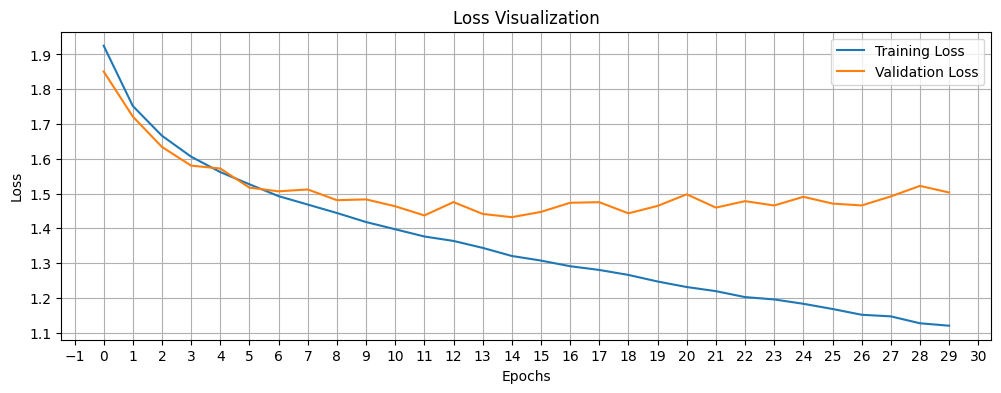

In [38]:
plt.figure(figsize=(12, 4))
plt.plot(history.history["loss"], label="Training Loss")
plt.plot(history.history["val_loss"], label="Validation Loss")
plt.legend()
plt.xticks(range(-1,31))
plt.grid()
plt.title("Loss Visualization")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.show()

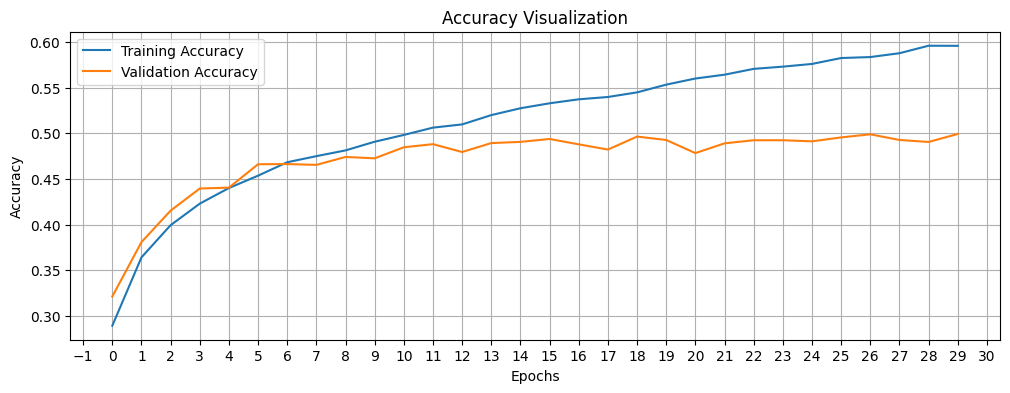

In [41]:
plt.figure(figsize=(12, 4))
plt.plot(history.history["accuracy"], label="Training Accuracy")
plt.plot(history.history["val_accuracy"], label="Validation Accuracy")
plt.legend()
plt.xticks(range(-1,31))
plt.grid()
plt.title("Accuracy Visualization")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.show()

In [49]:
def image_predict(path):
    img = load_img(path, target_size=(32, 32))
    img_arr = img_to_array(img)
    img_arr_norm = img_arr / 255.0
    img_flatten = np.expand_dims(img_arr_norm, axis=0)
    pred = model.predict(img_flatten)[0]
    pred_class = classes[np.argmax(pred)]
    return pred_class

In [50]:
image_predict("ship img.jpg")

1/1 [==============================] - 0s 26ms/step


'ship'

In [51]:
image_predict("bird.png")

1/1 [==============================] - 0s 27ms/step


'dog'

In [52]:
image_predict('truck.png')

1/1 [==============================] - 0s 32ms/step


'frog'

In [53]:
image_predict("deer img.png")

1/1 [==============================] - 0s 31ms/step


'bird'